<a href="https://colab.research.google.com/github/rmanicav/21Days-21Projects-MachineLearning/blob/main/Netflixcont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Netflix Content Analysis 🎬
Project Objective: To perform an in-depth exploratory data analysis of the Netflix dataset. We will explore trends in content production,
identify popular genres, analyze content ratings, and understand the distribution of movies and TV shows on the platform.
This project builds on foundational EDA by introducing time-series analysis and more complex data cleaning and transformation techniques.
'''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a consistent style for our plots
sns.set_style('darkgrid')

In [ ]:
#use try block
try:
    netflix_df = pd.read_csv('Datasets/Netflix_Titles Dataset/netflix_titles.csv')
    print("Netflix dataset loaded successfully!")
    print(netflix_df.head())
except FileNotFoundError:
    print("Error: 'netflix_titles.csv' not found in 'Datasets/Netflix_Titles Dataset/' folder. Please check the file path or name.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")


Netflix dataset loaded successfully!
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017   

In [ ]:
netflix_df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
print("Missing values in each column:")
print(netflix_df.isnull().sum())

Missing values in each column:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [ ]:
# 1. Handle missing values in 'director' and 'cast'
# Since these are text fields and many are missing, we'll fill them with 'Unknown'.
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

In [ ]:
print("Missing values in each column:")
print(netflix_df.isnull().sum())

Missing values in each column:
show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64


In [ ]:
# 2. Handle missing 'country'
# We'll fill with the mode, which is the most common country.
mode_country = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(mode_country)

In [ ]:
# 3. Drop the few rows with missing 'date_added' and 'rating'
# Since the number is small (less than 0.2% of data), dropping them is a safe option.
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [ ]:
# 4. Convert 'date_added' to datetime objects
# Use format='mixed' to handle potential variations in date formats
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', dayfirst=False)

In [ ]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [ ]:
# 5. Create new features for year and month added
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [ ]:
print("\nData types after transformation:")
print(netflix_df.dtypes)


Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


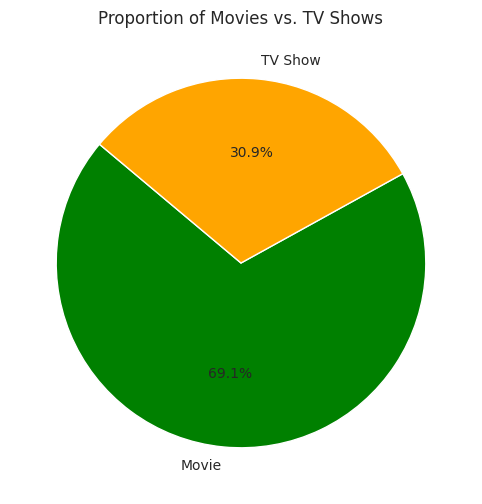

In [ ]:
plt.figure(figsize=(8, 6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'orange'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

<Figure size 1400x800 with 0 Axes>

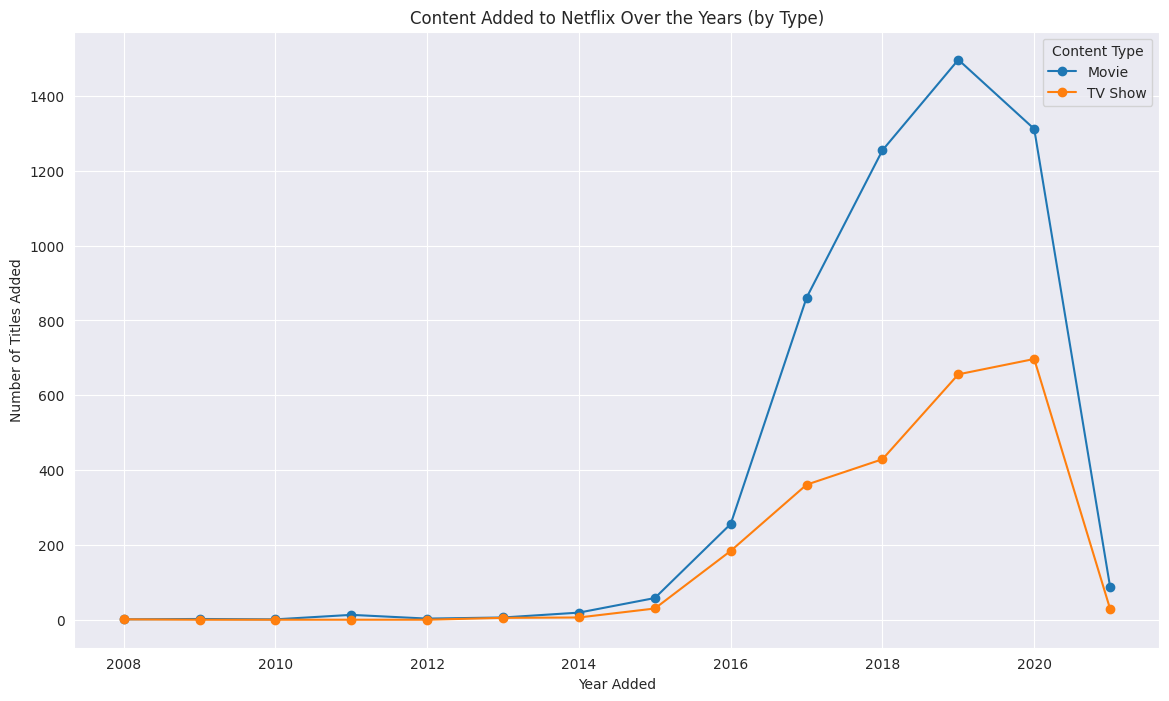

In [ ]:
#How has the distribution of content ratings changed over time?
# Group data by year and content type
content_over_time = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

In [ ]:
# Split the 'listed_in' column and explode it
genres = netflix_df.assign(genre=netflix_df['listed_in'].str.split(', ')).explode('genre')

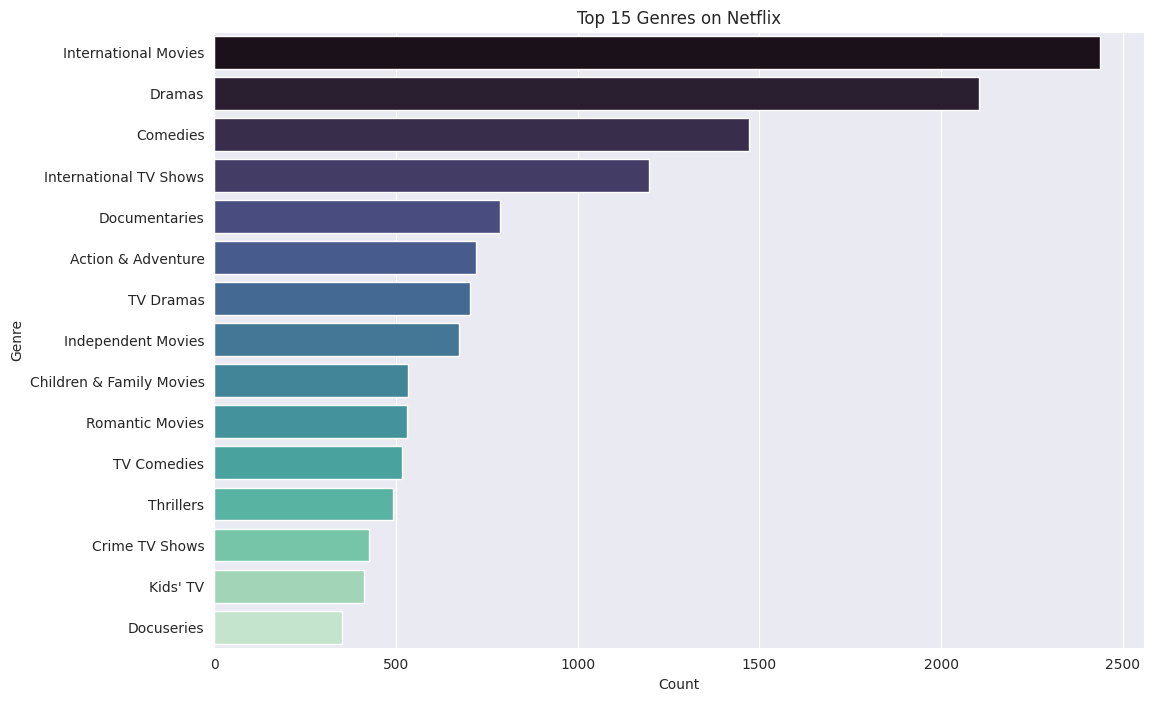

In [ ]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [ ]:
# Separate movies and TV shows
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [ ]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

In [ ]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

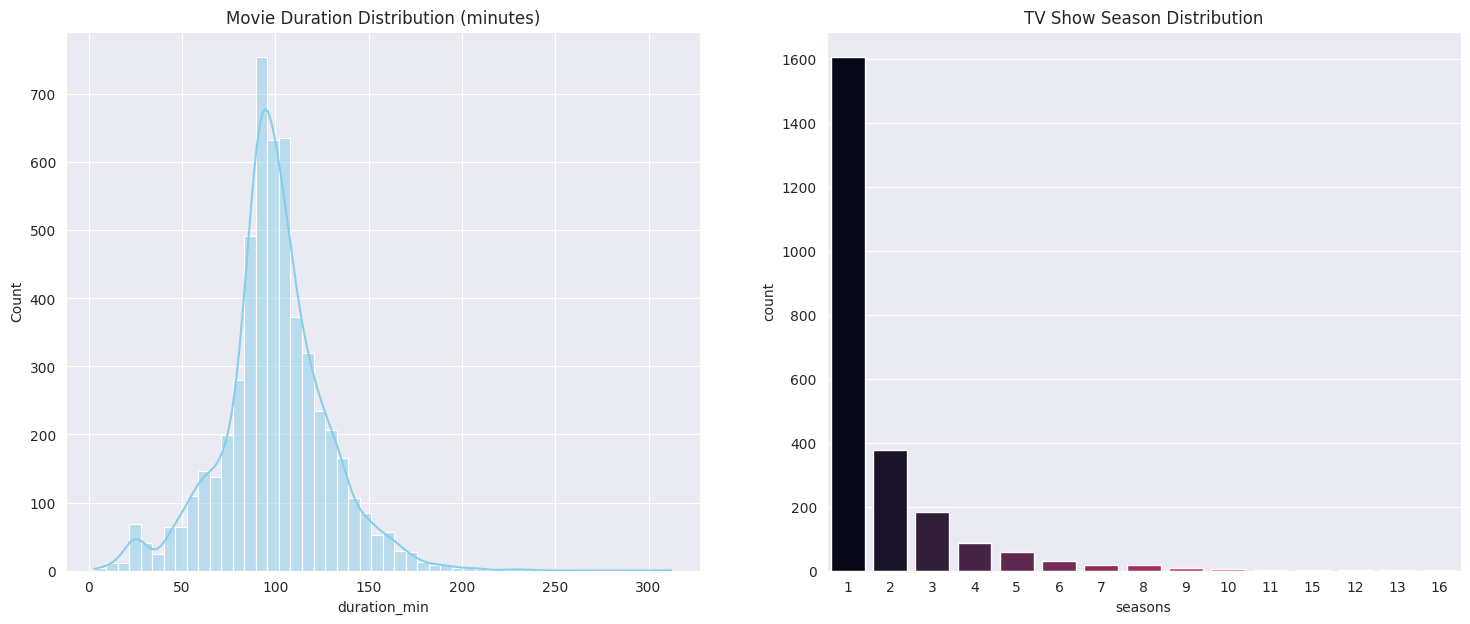

In [ ]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

In [ ]:
# Handle the multi-country listings similar to genres
countries = netflix_df.assign(country=netflix_df['country'].str.split(', ')).explode('country')

In [ ]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

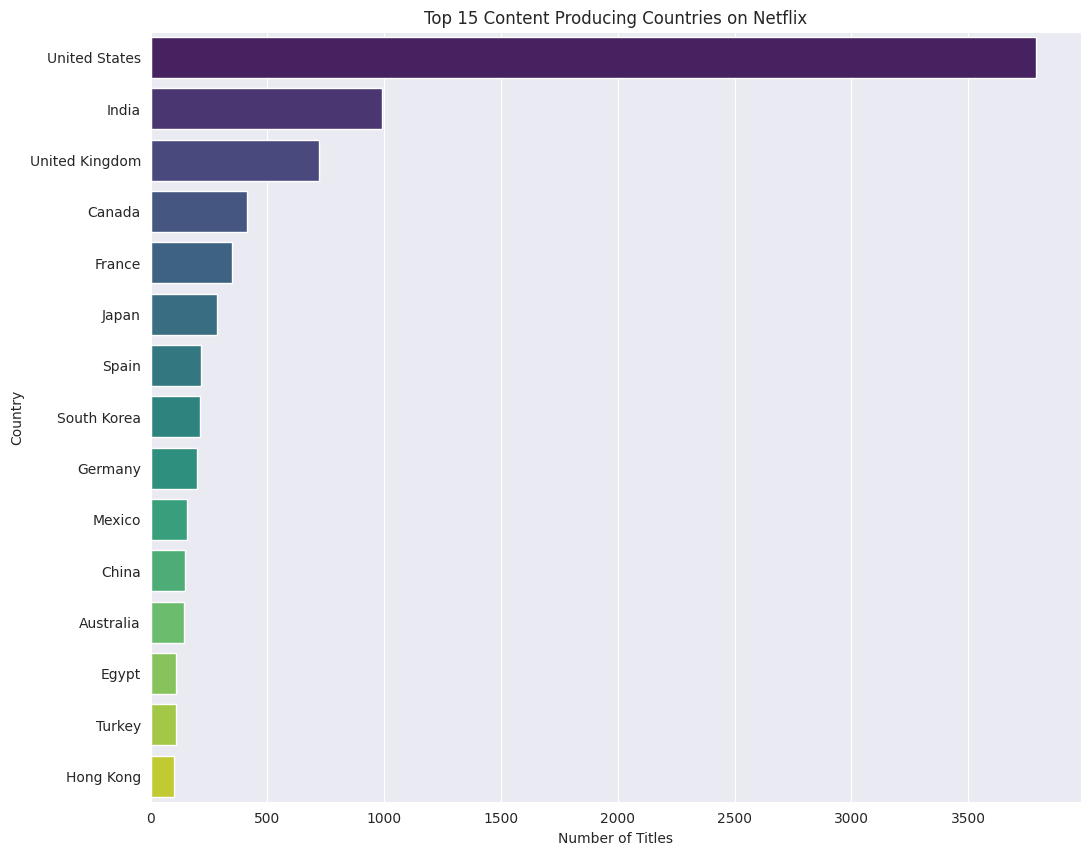

In [ ]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

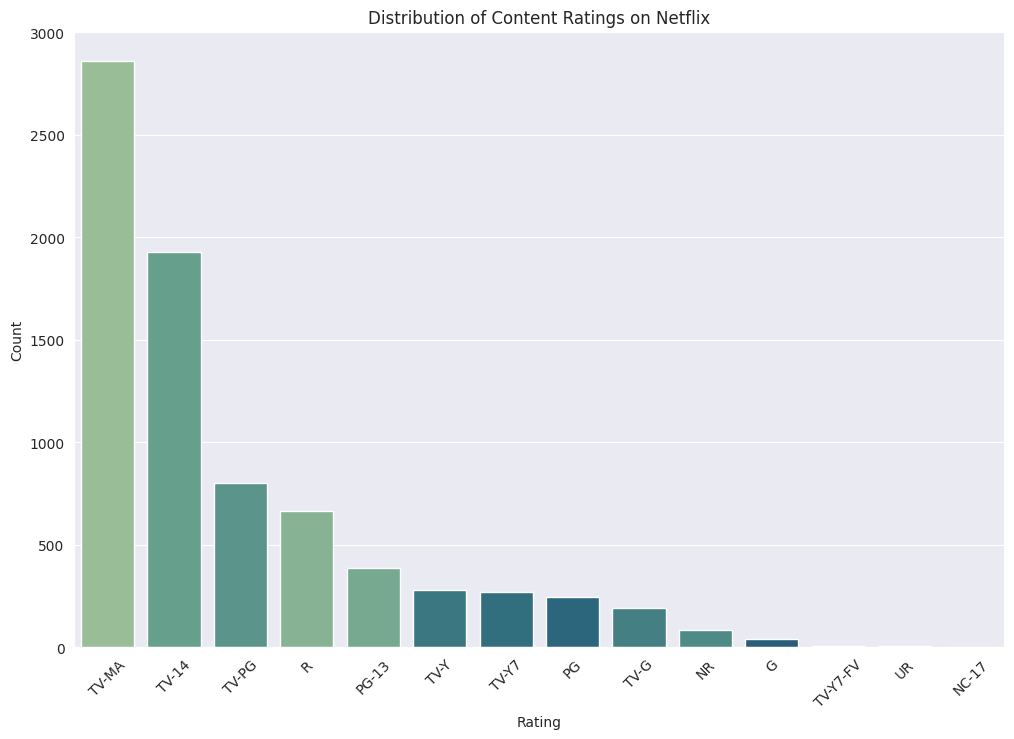

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

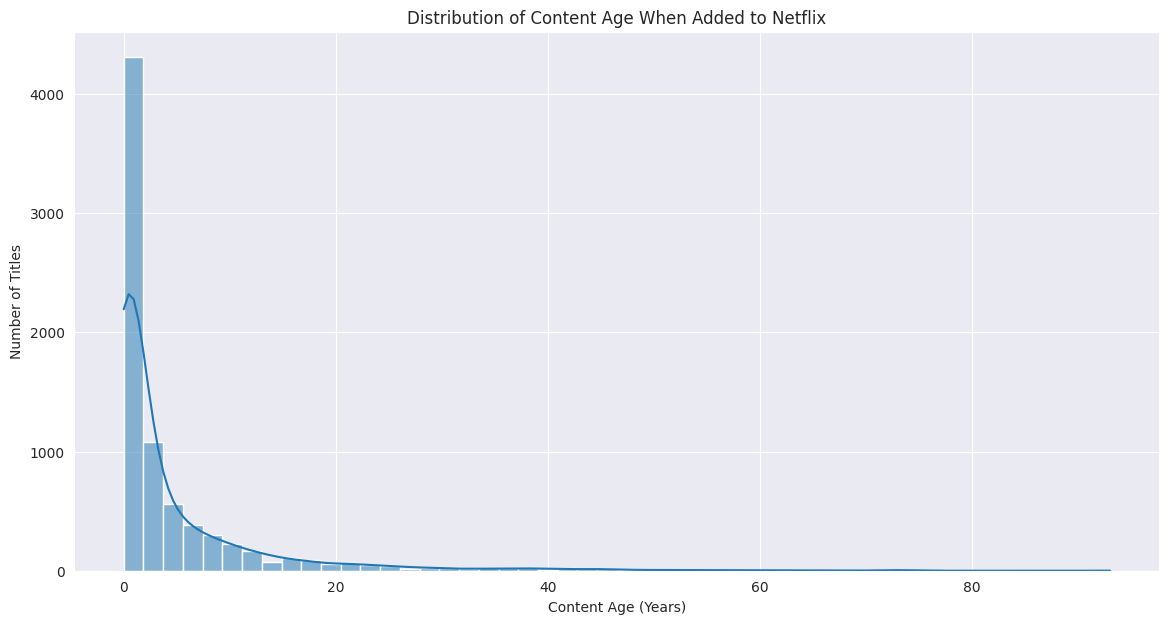

In [ ]:
# Create the 'age_on_netflix' feature
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']

# Filter out any potential errors where added_year is before release_year
content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

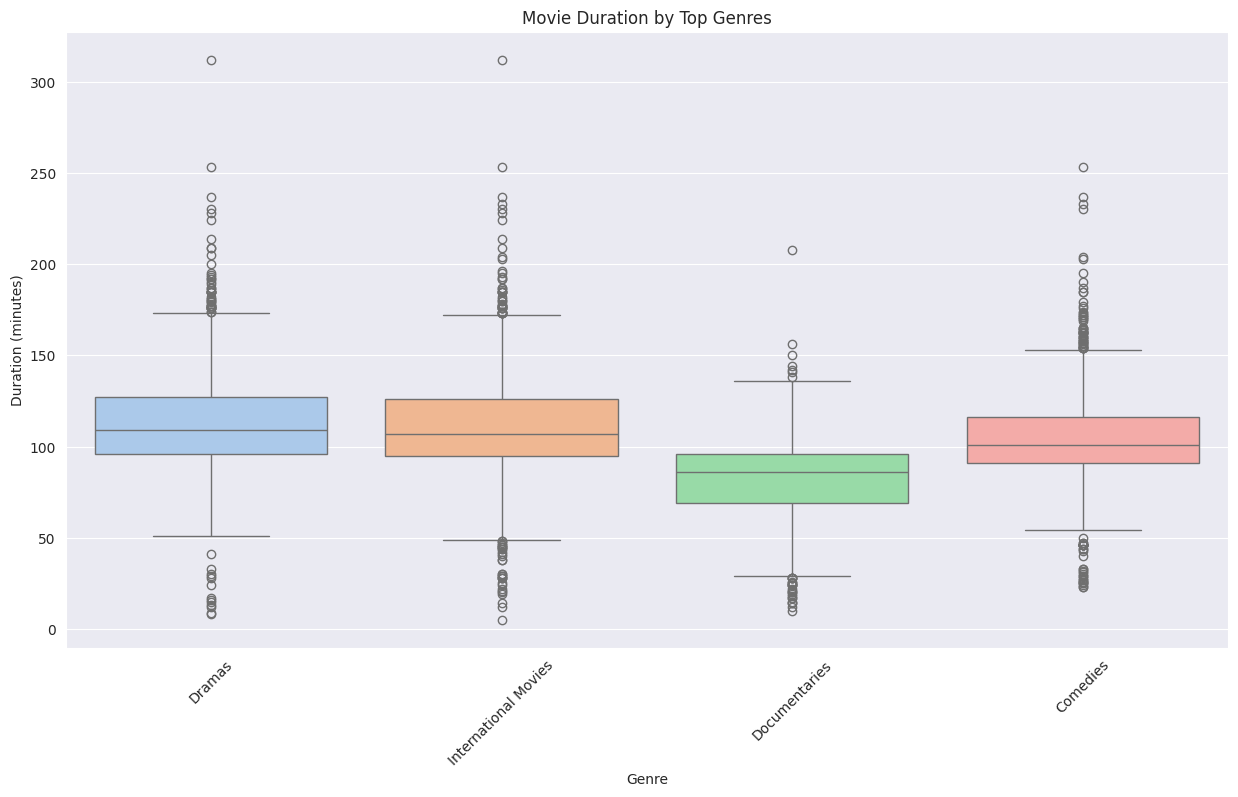

In [ ]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

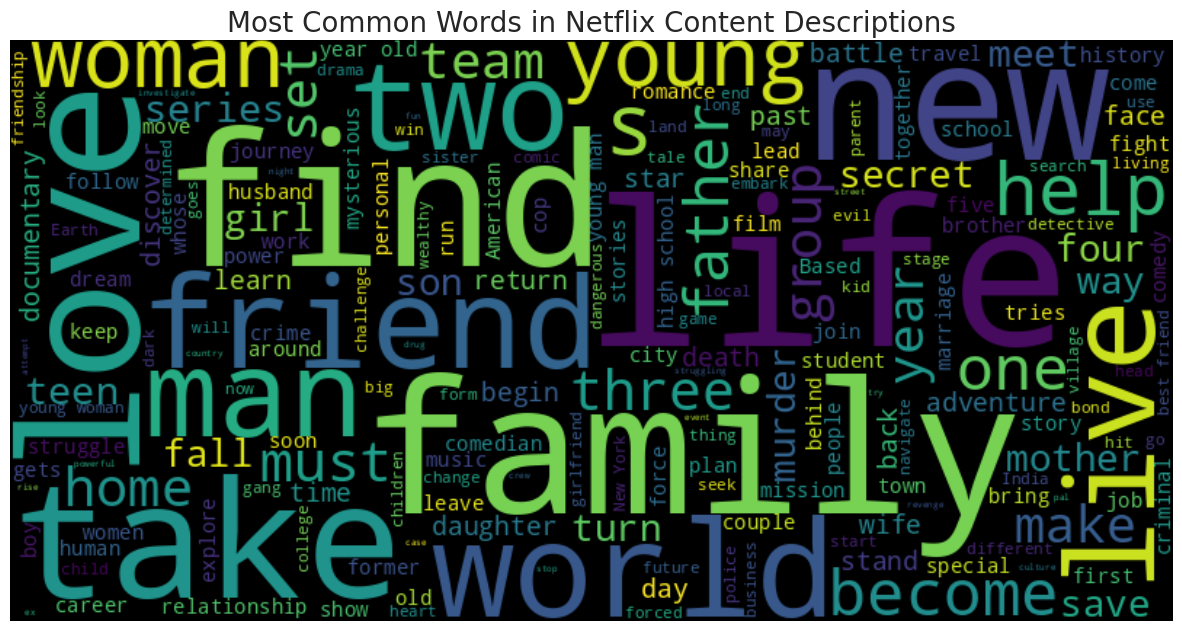

In [ ]:
# Combine all descriptions into a single string
text = ' '.join(netflix_df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()


Last 5 rows of ratings_over_time:
rating       G  NC-17  NR  PG  PG-13    R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  \
year_added                                                                   
2017         4      1  26  20     26   66    339    23    454    177    37   
2018        12      0  14  34     55  131    457    37    659    193    41   
2019         8      1   5  85    146  226    519    41    790    208    58   
2020        10      0   0  89    132  199    464    68    712    152   117   
2021         1      0   0   9     19   25     21     6     26      2     5   

rating      TV-Y7  TV-Y7-FV  UR  
year_added                       
2017           46         1   1  
2018           47         1   0  
2019           57         1   4  
2020           65         0   0  
2021            3         0   0  


<Figure size 1500x800 with 0 Axes>

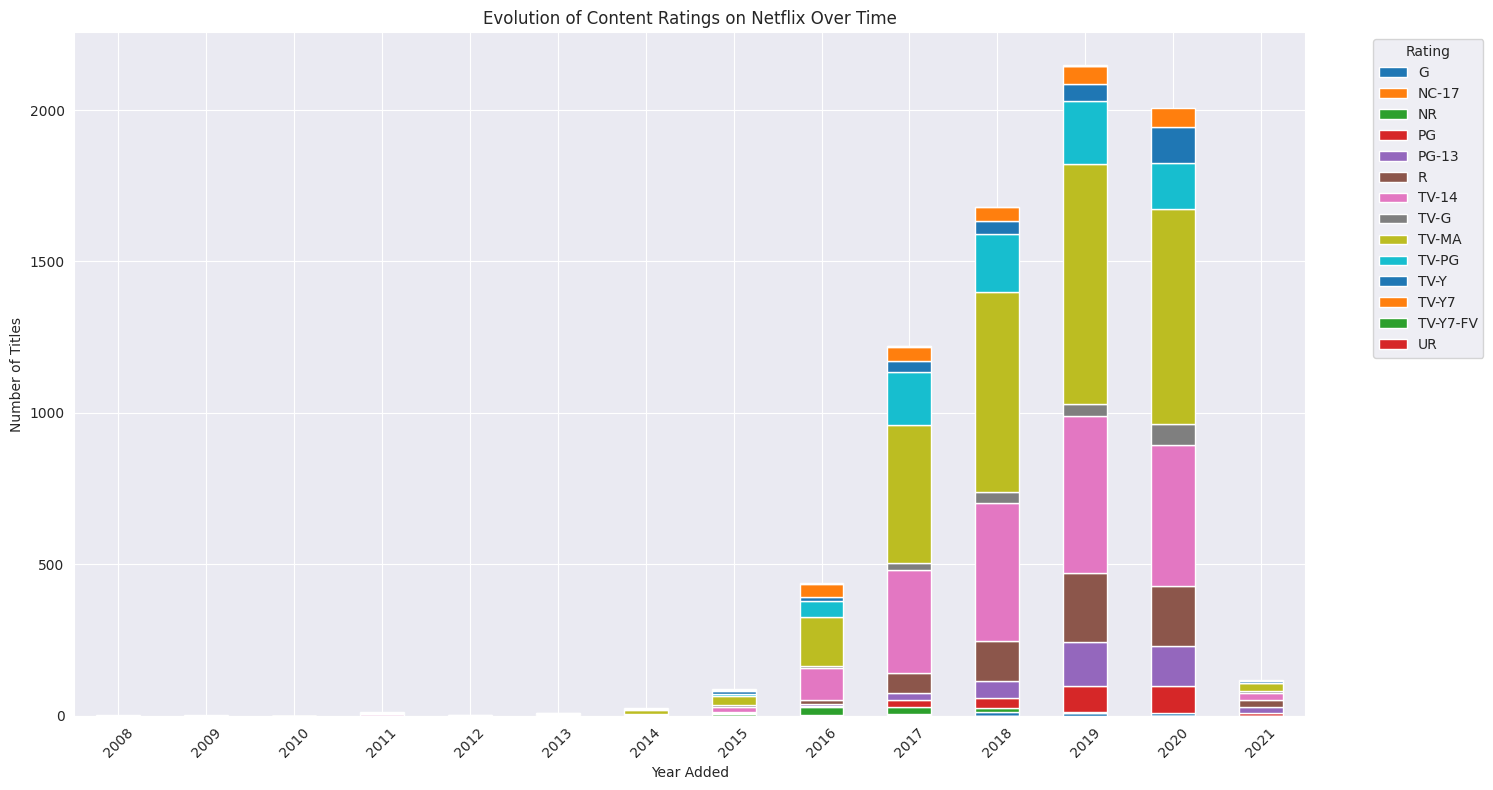

In [ ]:
#1 ---------How has the distribution of content ratings changed over time?
ratings_over_time = netflix_df.groupby(['year_added', 'rating']).size().unstack(fill_value=0)
print("\nLast 5 rows of ratings_over_time:")
print(ratings_over_time.tail(5))

#plot graph
plt.figure(figsize=(15, 8))
ratings_over_time.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Evolution of Content Ratings on Netflix Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

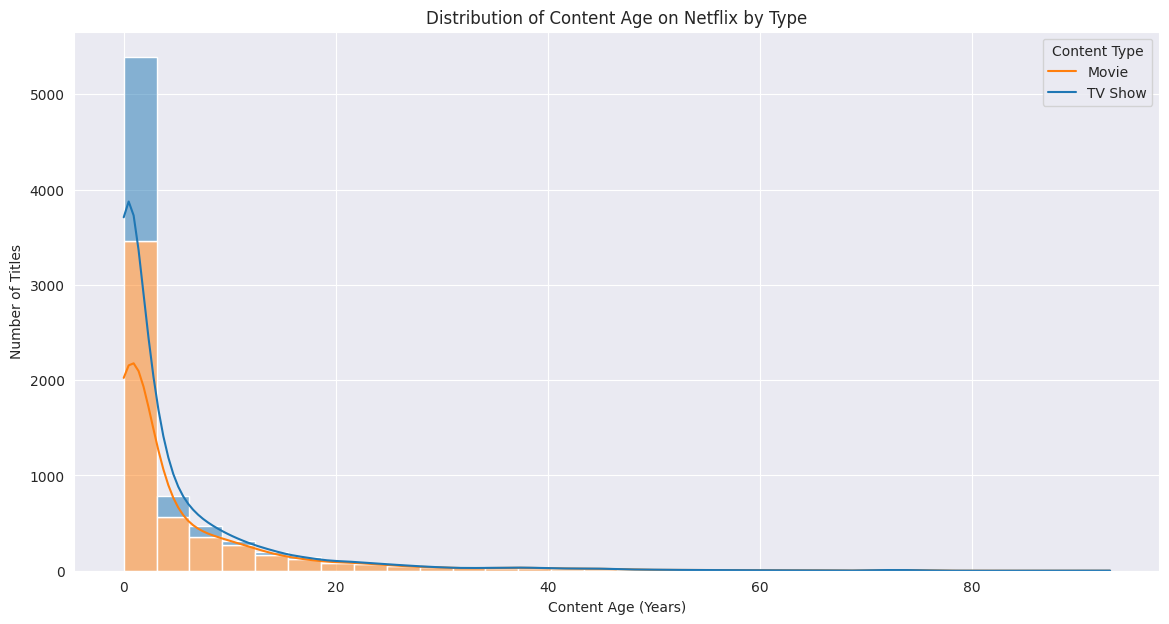

In [ ]:
#2 Is there a relationship between content age and its type (Movie vs. TV Show)?
# get age on netflix field
content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]
# plot content age and netflix types(movies vs. TV show)
plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', hue='type', multiple='stack', bins=30, kde=True)
plt.title('Distribution of Content Age on Netflix by Type')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type', labels=['Movie', 'TV Show'])
plt.show()

**Interpretation:**


1.   Movies are easier to license long after release, making them ideal for building a deep back catalog. hence are older.
2.   TV shows are very recent
3.   TV shows are added more than movies with increase in netflix own productions





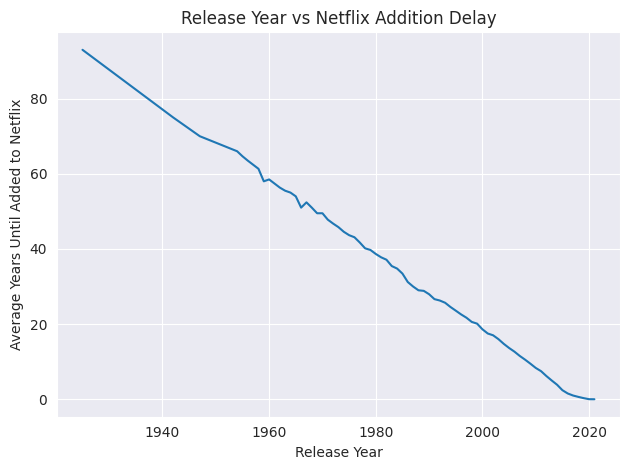

In [ ]:
#3 Can we identify any trends in content production based on the release year vs. the year added to Netflix?


# Calculate delay between release and Netflix addition
# Drop rows without date_added and create a proper copy
netflix_df = netflix_df.dropna(subset=["date_added"]).copy()

# Extract year added
netflix_df.loc[:, "year_added"] = pd.to_datetime(
    netflix_df["date_added"]
).dt.year

# Keep valid rows only
netflix_df = netflix_df.loc[
    netflix_df["release_year"] <= netflix_df["year_added"]
]

# Safely create delay column
netflix_df.loc[:, "delay_years"] = (
    netflix_df["year_added"] - netflix_df["release_year"]
)

# Average delay per release year
trend = netflix_df.groupby("release_year")["delay_years"].mean()

#plot
plt.plot(trend.index, trend.values)
plt.xlabel("Release Year")
plt.ylabel("Average Years Until Added to Netflix")
plt.title("Release Year vs Netflix Addition Delay")
plt.tight_layout()
plt.show()


**Interpretions**
Trend is shorter time difference between release year and date added


Top 5 Word Pairs in Netflix Content Descriptions:
high school : 128
young man : 101
young woman : 90
new york : 81
best friends : 51


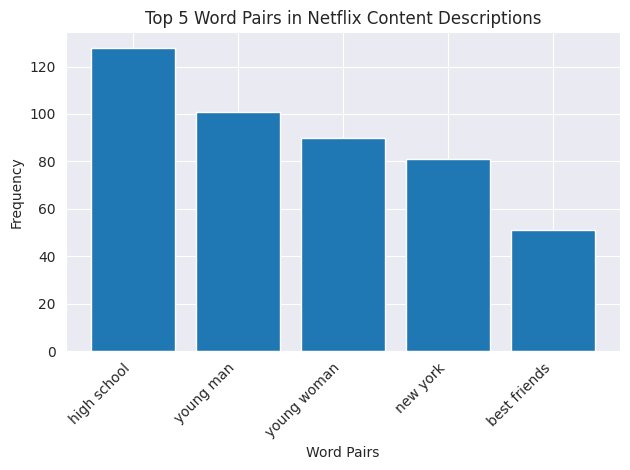

In [ ]:
#4 What are the most common word pairs or phrases in content descriptions?
#word pairs are bigrams
import re
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.util import ngrams

#get descriptions
descriptions = netflix_df["description"].dropna().str.lower()

#initialize bigrams list
bigrams = []

#iterate through each description
for desc in descriptions:
    # clean text
    # Remove punctuation, numbers, and special characters
    # Keep only lowercase letters and spaces
    desc = re.sub(r"[^a-z\s]", "", desc)

    #split for only english words
    words = [w for w in desc.split() if w not in ENGLISH_STOP_WORDS]

    # generate bigrams
    bigrams.extend(ngrams(words, 2))

# Top 5 word pairs
top_5 = Counter(bigrams).most_common(5)

#print word pairs
print("Top 5 Word Pairs in Netflix Content Descriptions:")
for (w1, w2), count in top_5:
    print(f"{w1} {w2} : {count}")

# get count and word pairs
pairs, counts = zip(*[(f"{w1} {w2}", c) for (w1, w2), c in top_5])

# Plot
plt.figure()
plt.bar(pairs, counts)
plt.title("Top 5 Word Pairs in Netflix Content Descriptions")
plt.xlabel("Word Pairs")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Content descriptions repeatedly use short, familiar phrases that quickly convey character, genre, setting, and emotional hook, optimizing for fast viewer decisions.

Top 5 Directors in the Netflix are 
 director
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Name: count, dtype: int64


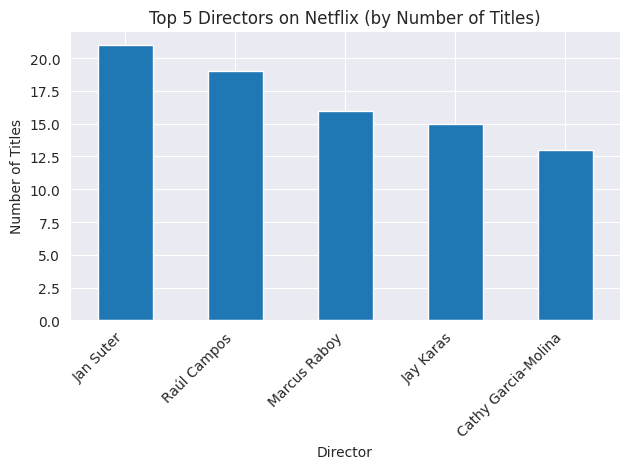

In [ ]:
#5 Who are the top directors on Netflix?

# Drop rows with missing directors and remove unknown
directors = netflix_df["director"].dropna()
directors = directors[directors.str.lower() != "unknown"]

# Split multiple directors and explode into separate rows
directors = directors.str.split(", ").explode()

# Count titles per director and get top 5
top_directors = directors.value_counts().head(5)

print("Top 5 Directors in the Netflix are \n" ,top_directors)

# Plot
plt.figure()
top_directors.plot(kind="bar")
plt.title("Top 5 Directors on Netflix (by Number of Titles)")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
